In [1]:
from models.pix2pixHD.networks import GlobalGenerator, Generator
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
g = GlobalGenerator(3, 3, 64, 3, 9)

image = Image.open('../../../data/train_img/aachen_000000_000019_leftImg8bit.png')

transform = transforms.Compose([
    transforms.PILToTensor()
])

img_tensor = transform(image).unsqueeze(0)

img = g(img_tensor.float())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


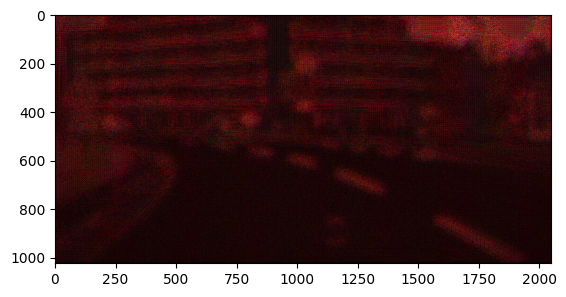

In [3]:
plt.imshow(img.squeeze(0).permute(1, 2, 0).detach().numpy())

In [4]:
g_all = Generator(1, 3, 64, 3, 9, 1, 3)

image = Image.open('../../../data/train_label/aachen_000000_000019_gtFine_labelIds.png')

transform = transforms.Compose([
    transforms.PILToTensor()
])

img_tensor = transform(image).unsqueeze(0)

img_all = g_all(img_tensor.float())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


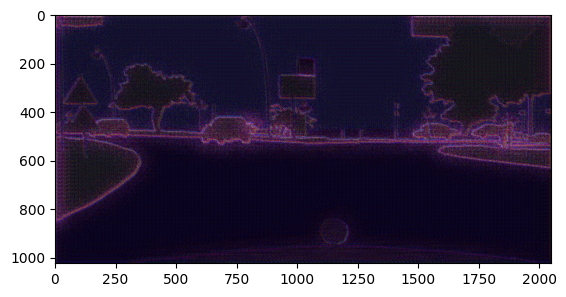

In [5]:
plt.imshow(img_all.squeeze(0).permute(1, 2, 0).detach().numpy())